In [1]:
import numpy as np
import pandas as pd
from math import *
from matplotlib import pyplot as plt,image,patches
from matplotlib.path import Path
from scipy.misc import imread
%matplotlib nbagg

/home/josema/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Resultados de la busqueda de Exoplanetas

base de datos: Kepler Exoplanets search result from Nasa

In [2]:
Data = pd.read_csv('cumulative.csv')

In [3]:
Data.columns

Index([u'rowid', u'kepid', u'kepoi_name', u'kepler_name', u'koi_disposition',
       u'koi_pdisposition', u'koi_score', u'koi_fpflag_nt', u'koi_fpflag_ss',
       u'koi_fpflag_co', u'koi_fpflag_ec', u'koi_period', u'koi_period_err1',
       u'koi_period_err2', u'koi_time0bk', u'koi_time0bk_err1',
       u'koi_time0bk_err2', u'koi_impact', u'koi_impact_err1',
       u'koi_impact_err2', u'koi_duration', u'koi_duration_err1',
       u'koi_duration_err2', u'koi_depth', u'koi_depth_err1',
       u'koi_depth_err2', u'koi_prad', u'koi_prad_err1', u'koi_prad_err2',
       u'koi_teq', u'koi_teq_err1', u'koi_teq_err2', u'koi_insol',
       u'koi_insol_err1', u'koi_insol_err2', u'koi_model_snr',
       u'koi_tce_plnt_num', u'koi_tce_delivname', u'koi_steff',
       u'koi_steff_err1', u'koi_steff_err2', u'koi_slogg', u'koi_slogg_err1',
       u'koi_slogg_err2', u'koi_srad', u'koi_srad_err1', u'koi_srad_err2',
       u'ra', u'dec', u'koi_kepmag'],
      dtype='object')

In [4]:
confirmed = Data[Data.koi_disposition == 'CONFIRMED'] #Extraemos los exoplanetas confirmados
ra, dec = Data.ra, Data.dec #Ascencion recta y declinacion todos los datos
ra_c, dec_c = confirmed.ra, confirmed.dec #Ascencion recta y declinacion exoplanetas confirmados

<IPython.core.display.Javascript object>


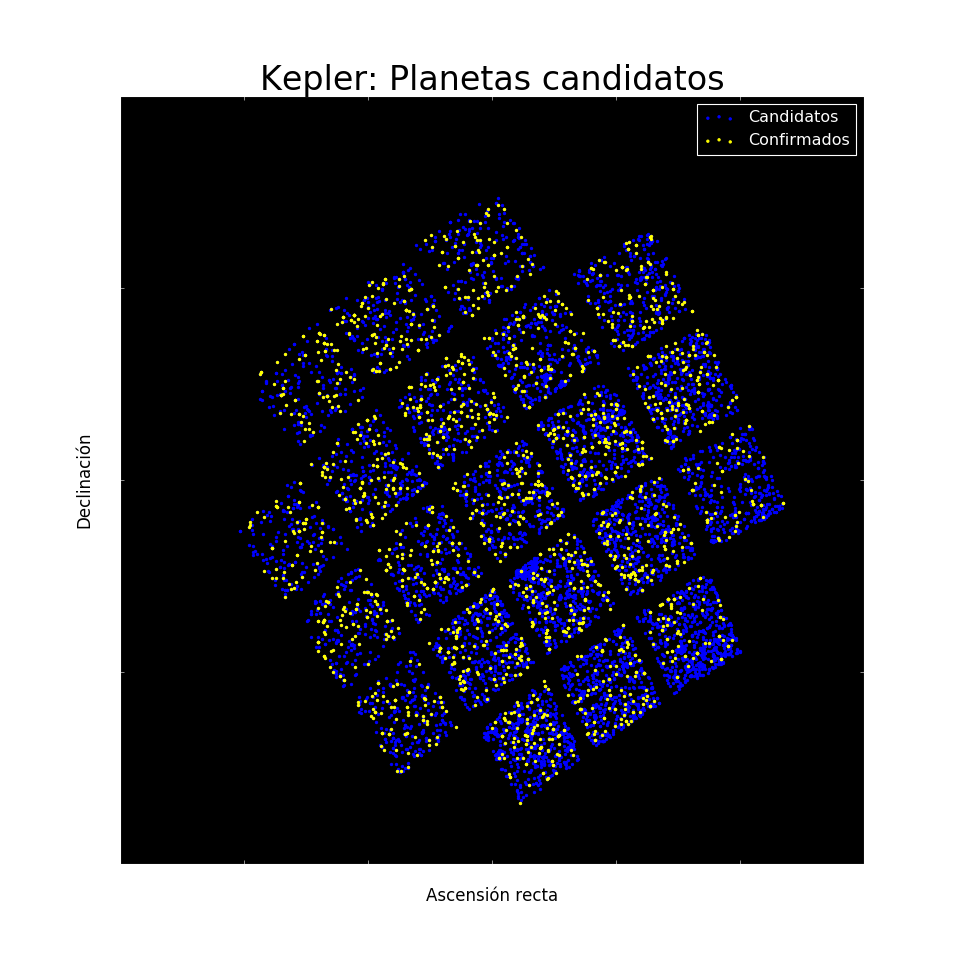

In [5]:
fig = plt.figure(figsize=(12, 12))
plt.style.use('dark_background')
ax= fig.gca()
ax.scatter(ra, dec, s=4, label='Candidatos',color='blue')
ax.scatter(ra_c, dec_c, s=4, label="Confirmados",color='yellow')
ax.set_xlabel(u"Ascensión recta",size=15)
ax.set_ylabel(u"Declinación",size=15)
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.set_title('Kepler: Planetas candidatos',color= 'black',size=30)
ax.legend()
fig.savefig('Graph1.png')

<IPython.core.display.Javascript object>


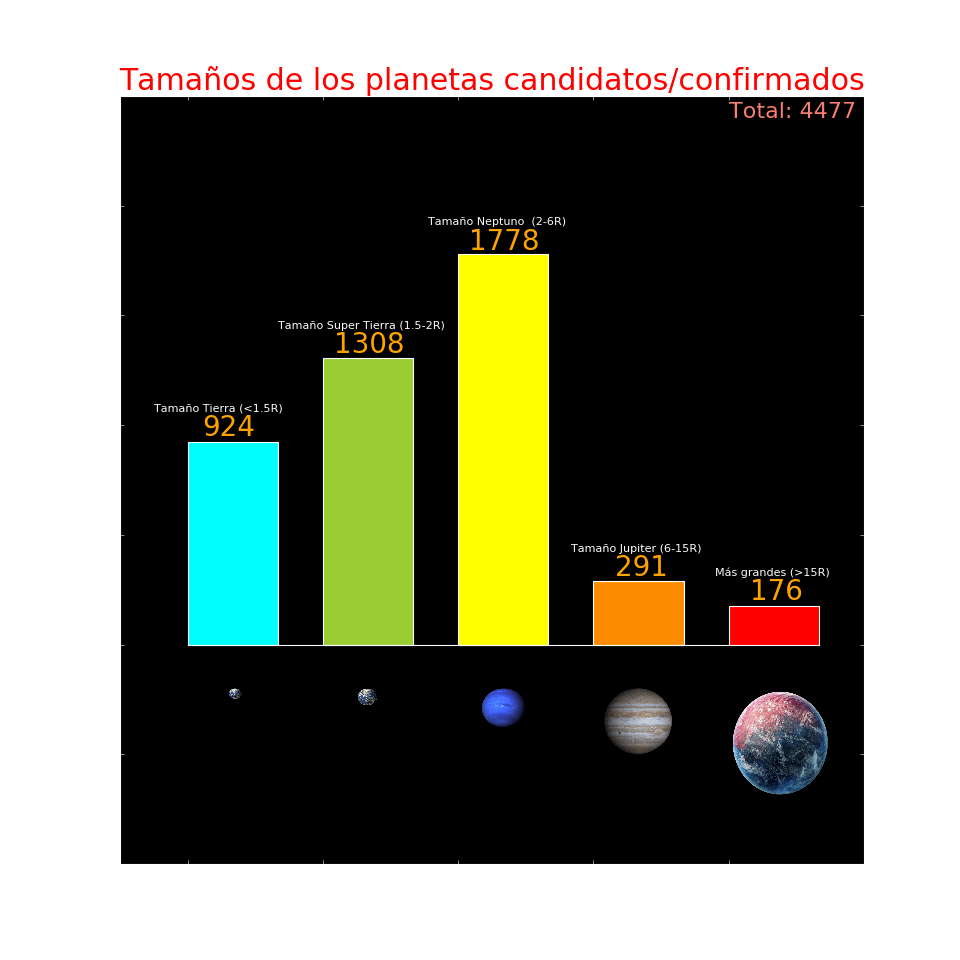

In [6]:

im = image.imread('Planeta-Tierra.png')
im2 = image.imread('Planeta-Tierra.png')
im3 = image.imread('Neptune.png')
im4 = image.imread('jupiter.png')
im5 = image.imread('exoplanet.png')

fig2,ax2 = plt.subplots(figsize=(12,12))
ax2.imshow(im, aspect='auto', extent=(0.3, 0.4, -250, -200), zorder=-1)
ax2.imshow(im2,aspect='auto',extent = (1.25,1.4,-280,-200),zorder = -1)
ax2.imshow(im3,aspect='auto',extent = (2.17,2.5,-380,-200),zorder = -1)
ax2.imshow(im4,aspect='auto',extent = (3.075,3.575,-500,-200),zorder = -1)
ax2.imshow(im5,aspect='auto',extent = (4.,4.75,-700,-200),zorder = -1)        

candidate = Data[Data.koi_disposition == 'CANDIDATE']
first_bar = candidate[candidate.koi_prad < 1.25] + confirmed[confirmed.koi_prad < 1.25]
second_bar = candidate[(candidate.koi_prad >= 1.25) & (candidate.koi_prad < 2.)] + \
            confirmed[(confirmed.koi_prad >= 1.25) & (confirmed.koi_prad < 2.)]
third_bar = candidate[(candidate.koi_prad >= 2.) & (candidate.koi_prad < 6.)] + \
            confirmed[(confirmed.koi_prad >= 2.) & (confirmed.koi_prad < 6.)]
four_bar = candidate[(candidate.koi_prad >= 6.) & (candidate.koi_prad < 15.)] + \
            confirmed[(confirmed.koi_prad >= 6.) & (confirmed.koi_prad < 15.)]
five_bar = candidate[(candidate.koi_prad >= 15.)] + \
            confirmed[(confirmed.koi_prad >= 15.)]
bars = [len(first_bar),len(second_bar),len(third_bar),len(four_bar),len(five_bar)]

N = len(bars)
nbars = range(N)
colors = ['aqua','yellowgreen','yellow','darkorange','red']
ax2.bar(nbars, bars, 1/1.5,color=colors)
ax2.set_xlim(-0.5,5)
ax2.set_ylim(-1000,2500)
ax2.text(0.5,950,len(first_bar),ha='right',color='orange',size=25)
ax2.text(0.7,1060,u'Tamaño Tierra (<1.5R)',ha='right',color='white',size=10)
ax2.text(1.6,1328,len(second_bar),ha='right',color='orange',size=25)
ax2.text(1.9,1440,u'Tamaño Super Tierra (1.5-2R)',ha='right',color='white',size=10)
ax2.text(2.6,1800,len(third_bar),ha='right',color='orange',size=25)
ax2.text(2.8,1910,u'Tamaño Neptuno  (2-6R)',ha='right',color='white',size=10)
ax2.text(3.55,311,len(four_bar),ha='right',color='orange',size=25)
ax2.text(3.8,421,u'Tamaño Jupiter (6-15R)',ha='right',color='white',size=10)
ax2.text(4.55,203,len(five_bar),ha='right',color='orange',size=25)
ax2.text(4.75,313,u'Más grandes (>15R)',ha='right',color='white',size=10)
total = len(first_bar)+len(second_bar)+len(third_bar)+len(four_bar)+len(five_bar)
ax2.text(4,2400,'Total: ' + str(total),color='salmon',size=20)
ax2.set_title(u'Tamaños de los planetas candidatos/confirmados',ha='center',color='red',size=27)
ax2.plot(nbars,[0]*N,color='white')
fig2.savefig('Graph2.png')

<IPython.core.display.Javascript object>


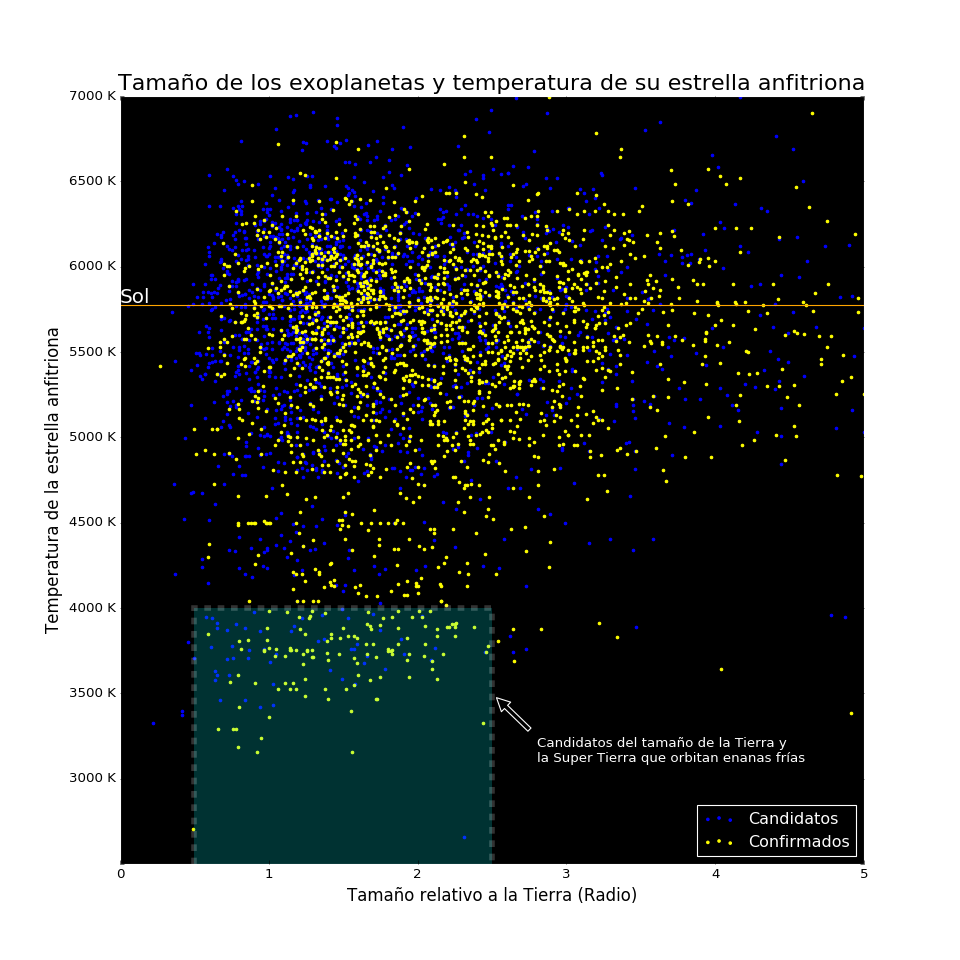

In [7]:
fig3 = plt.figure(figsize=(12,12))
ax3 = fig3.gca()

Tstar = candidate.koi_steff
radii = candidate.koi_prad

con_Tstar = confirmed.koi_steff
con_radii = confirmed.koi_prad


ax3.scatter(radii,Tstar,s=5,label='Candidatos',color='blue')
ax3.scatter(con_radii,con_Tstar,s=5,label='Confirmados',color='yellow')

ax3.tick_params(axis='x', colors='black')
ax3.tick_params(axis='y', colors='black')
ax3.set_yticklabels([' ','3000 K','3500 K','4000 K','4500 K','5000 K','5500 K','6000 K','6500 K','7000 K'])
ax3.set_ylabel(u'Temperatura de la estrella anfitriona',size=15)
ax3.set_xlabel(u'Tamaño relativo a la Tierra (Radio)',size=15)
ax3.yaxis.label.set_color('black')
ax3.xaxis.label.set_color('black')
ax3.set_title(u'Tamaño de los exoplanetas y temperatura de su estrella anfitriona',color='black',size=20)

vertices = [(0.5,0.0),(0.5,4000),(2.5,4000),(2.5,0.0)]
codes =  [Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO]
path=Path(vertices,codes)
patch=patches.PathPatch(path)
ax3.add_patch(patch)
ax3.patches[0].set_color('white')
ax3.patches[0].set_alpha(0.2)
ax3.patches[0].set_facecolor('aqua')
ax3.patches[0].set_linestyle('dashed')
ax3.patches[0].set_linewidth(5)

ax3.annotate(u'Candidatos del tamaño de la Tierra y\nla Super Tierra que orbitan enanas frías', 
             xy=(2.5, 3500), xytext=(2.8, 3100),arrowprops=dict(facecolor='black', shrink=0.1),)

ax3.set_xlim(0,5)
ax3.set_ylim(2500,7000)
ax3.legend(loc=4)
ax3.axhline(y=5778,color='orange')
ax3.text(0,5785,'Sol',size=18,color='white')
fig3.savefig('Graph3.png')

<IPython.core.display.Javascript object>


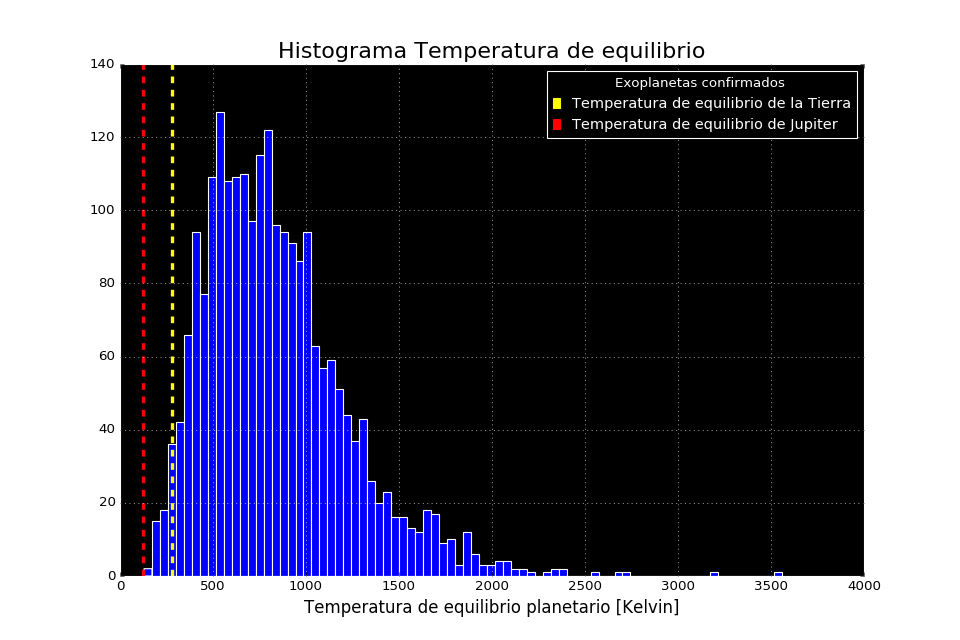

In [8]:
fig4 = plt.figure(figsize=(12,12))
ax4 = fig4.gca()
ax4 = confirmed.koi_teq.hist(bins=80, figsize=(12, 8),color='blue',label='Exoplanetas confirmados')
ax4.set_xlabel("Temperatura de equilibrio planetario [Kelvin]",size=15)
ax4.set_title("Histograma Temperatura de equilibrio",color='black',size='20')
ax4.yaxis.label.set_color('black')
ax4.xaxis.label.set_color('black')
ax4.tick_params(axis='x', colors='black')
ax4.tick_params(axis='y', colors='black')
ax4.axvline(x=278,color='yellow',linewidth = '3',linestyle = 'dashed')
ax4.axvline(x=122.15,color='red',linewidth = '3',linestyle = 'dashed')
ax4.set_xlim(0,4000)
ax4.legend()
patch1 = patches.Patch(color='yellow', label='Temperatura de equilibrio de la Tierra')
patch2 = patches.Patch(color='red',label='Temperatura de equilibrio de Jupiter')
plt.legend(title='Exoplanetas confirmados ', handles=[patch1,patch2],loc=1,handlelength=0.5,prop={'size': 13})
fig4.savefig('Graph4.png')

<IPython.core.display.Javascript object>


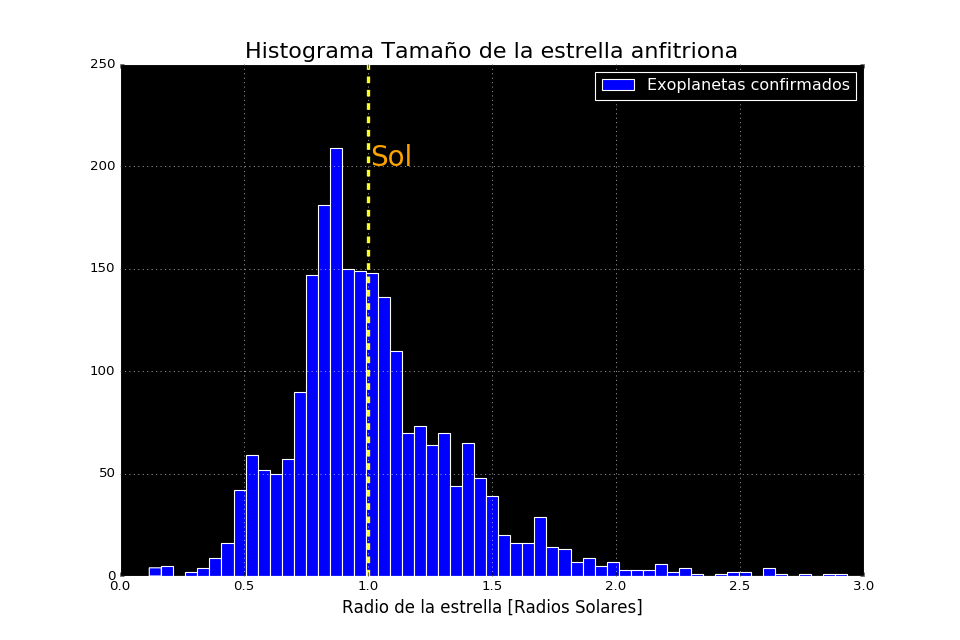

In [9]:
fig5 = plt.figure(figsize=(12,12))
ax5 = fig5.gca()
ax5 = confirmed.koi_srad.hist(bins=400, figsize=(12, 8),color='blue',label='Exoplanetas confirmados')
ax5.set_xlabel(u"Radio de la estrella [Radios Solares]",size=15)
ax5.set_title(u"Histograma Tamaño de la estrella anfitriona",color='black',size='20')
ax5.yaxis.label.set_color('black')
ax5.xaxis.label.set_color('black')
ax5.tick_params(axis='x', colors='black')
ax5.tick_params(axis='y', colors='black')
ax5.axvline(x=1,color='yellow',linewidth = '3',linestyle = 'dashed')
ax5.set_xlim(0,3.0)
ax5.text(1.01,200,'Sol',color='orange',size=25)
ax5.legend()
fig5.savefig('Graph5.png')

<IPython.core.display.Javascript object>


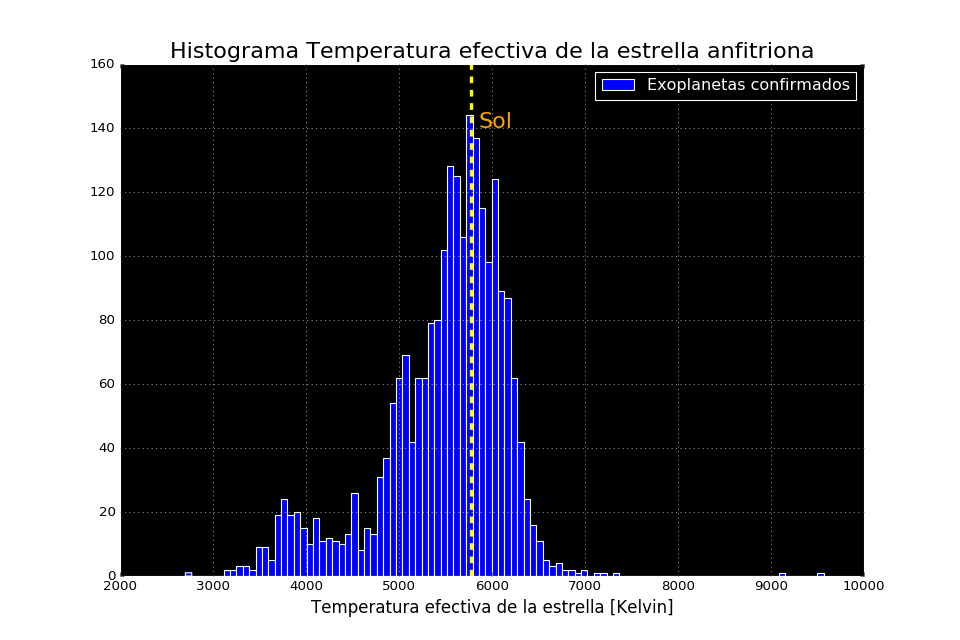

In [10]:
fig6 = plt.figure(figsize=(12,12))
ax6 = fig6.gca()
ax6 = confirmed.koi_steff.hist(bins=100, figsize=(12, 8),color='blue',label='Exoplanetas confirmados')
ax6.set_xlabel(u"Temperatura efectiva de la estrella [Kelvin]",size=15)
ax6.set_title(u"Histograma Temperatura efectiva de la estrella anfitriona",color='black',size='20')
ax6.yaxis.label.set_color('black')
ax6.xaxis.label.set_color('black')
ax6.tick_params(axis='x', colors='black')
ax6.tick_params(axis='y', colors='black')
ax6.axvline(x=5778,color='yellow',linewidth = '3',linestyle = 'dashed')
ax6.text(5850,140,'Sol',color='orange',size=20)
ax6.legend()
fig6.savefig('Graph6.png')

# Luminosidad

Luminosidad = $(\frac{RadioEstrella}{RadioSol})^2 + (\frac{TemperaturaEstrella}{TemperaturaSol})^4$

Temperatura del sol = 5778 k

In [11]:
StarLuminosity = (Data.koi_srad)**2 + (Data.koi_steff / 5778)**4

## Hertzsprung-Russell Diagram

<IPython.core.display.Javascript object>


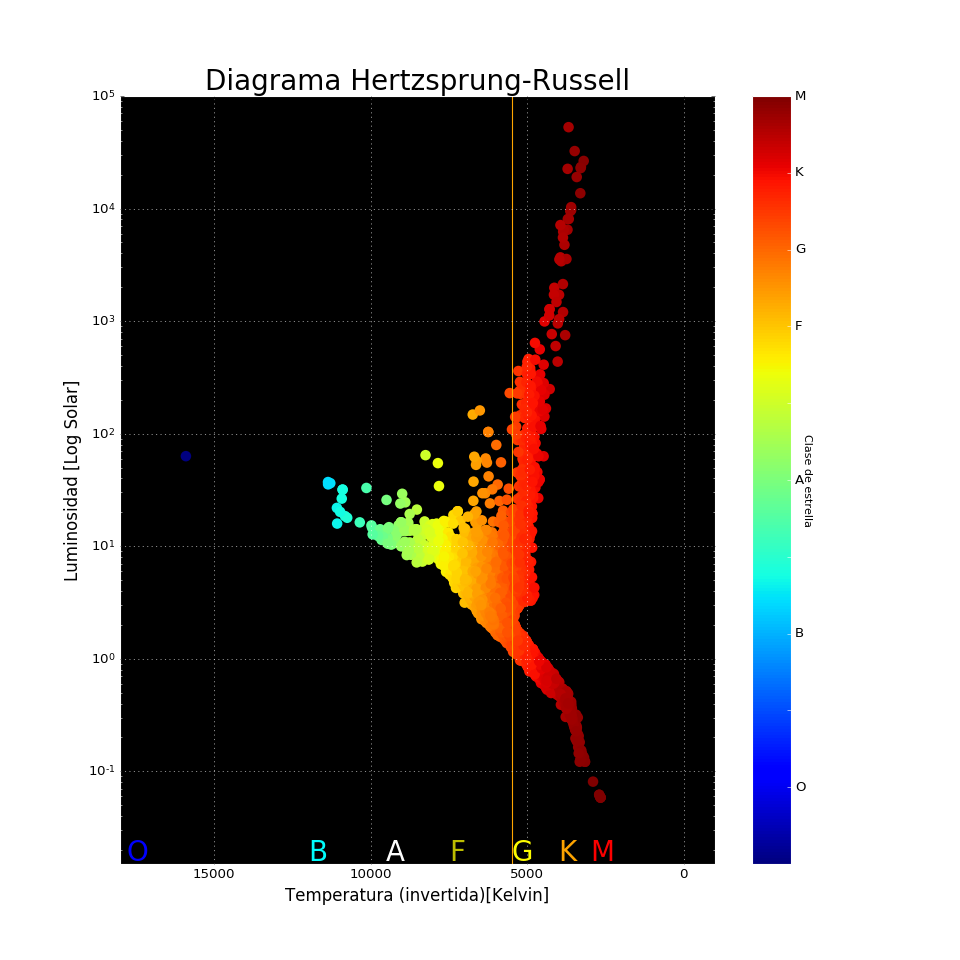

In [12]:
fig7 = plt.figure(figsize=(12,12))
ax7 = fig7.gca()

cmap = plt.get_cmap("jet")
colores = (np.log10(Data.koi_steff) -min(np.log10(Data.koi_steff)))/(-max(np.log10(Data.koi_steff))+min(np.log10(Data.koi_steff)))
colores = -colores**2

sc = ax7.scatter(Data.koi_steff,StarLuminosity,s=90,c=colores,cmap=cmap,edgecolor='None')

ax7.set_yscale('log')
ax7.yaxis.label.set_color('black')
ax7.xaxis.label.set_color('black')
ax7.tick_params(axis='x', colors='black')
ax7.tick_params(axis='y', colors='black')
ax7.set_xlim(-1000,18000)
ax7.set_ylim(1.5e-2,1e5)
ax7.invert_xaxis()

cbar = plt.colorbar(sc,orientation = 'vertical')
cbar.ax.set_yticklabels([' ','O',' ','B',' ','A',' ','F','G','K','M'],color='black')
cbar.set_label('Clase de estrella', rotation=270,color='black',size=10)

ax7.axvline(x=5500,color='orange')

            
ax7.grid(True)
ax7.text(5500,1.6e-2,'G',color='yellow',size=25)
ax7.text(4000,1.6e-2,'K',color='orange',size=25)
ax7.text(3000,1.6e-2,'M',color='red',size=25)
ax7.text(7500,1.6e-2,'F',color='y',size=25)
ax7.text(9500,1.6e-2,'A',color='white',size=25)
ax7.text(12000,1.6e-2,'B',color='aqua',size=25)
ax7.text(17800,1.6e-2,'O',color='Blue',size=25)

ax7.set_ylabel(u'Luminosidad [Log Solar]',size=15)
ax7.set_xlabel(u'Temperatura (invertida)[Kelvin]',size=15)
ax7.set_title('Diagrama Hertzsprung-Russell',color='black',size=25)
fig7.savefig('Graph7.png')

### Base de datos: Open Exoplanet Catalogue

In [13]:
data = pd.read_csv('oec.csv') # Open exoplanet catalogue
data.columns

Index([u'PlanetIdentifier', u'TypeFlag', u'PlanetaryMassJpt', u'RadiusJpt',
       u'PeriodDays', u'SemiMajorAxisAU', u'Eccentricity', u'PeriastronDeg',
       u'LongitudeDeg', u'AscendingNodeDeg', u'InclinationDeg',
       u'SurfaceTempK', u'AgeGyr', u'DiscoveryMethod', u'DiscoveryYear',
       u'LastUpdated', u'RightAscension', u'Declination', u'DistFromSunParsec',
       u'HostStarMassSlrMass', u'HostStarRadiusSlrRad', u'HostStarMetallicity',
       u'HostStarTempK', u'HostStarAgeGyr', u'ListsPlanetIsOn'],
      dtype='object')

In [14]:
data = data[data.ListsPlanetIsOn=='Confirmed planets']
indices = np.linspace(0,len(data)-1,len(data),dtype = np.int32)

In [15]:
data = data.sort_values('DistFromSunParsec')
data.index = indices
distancia = data.DistFromSunParsec

<IPython.core.display.Javascript object>


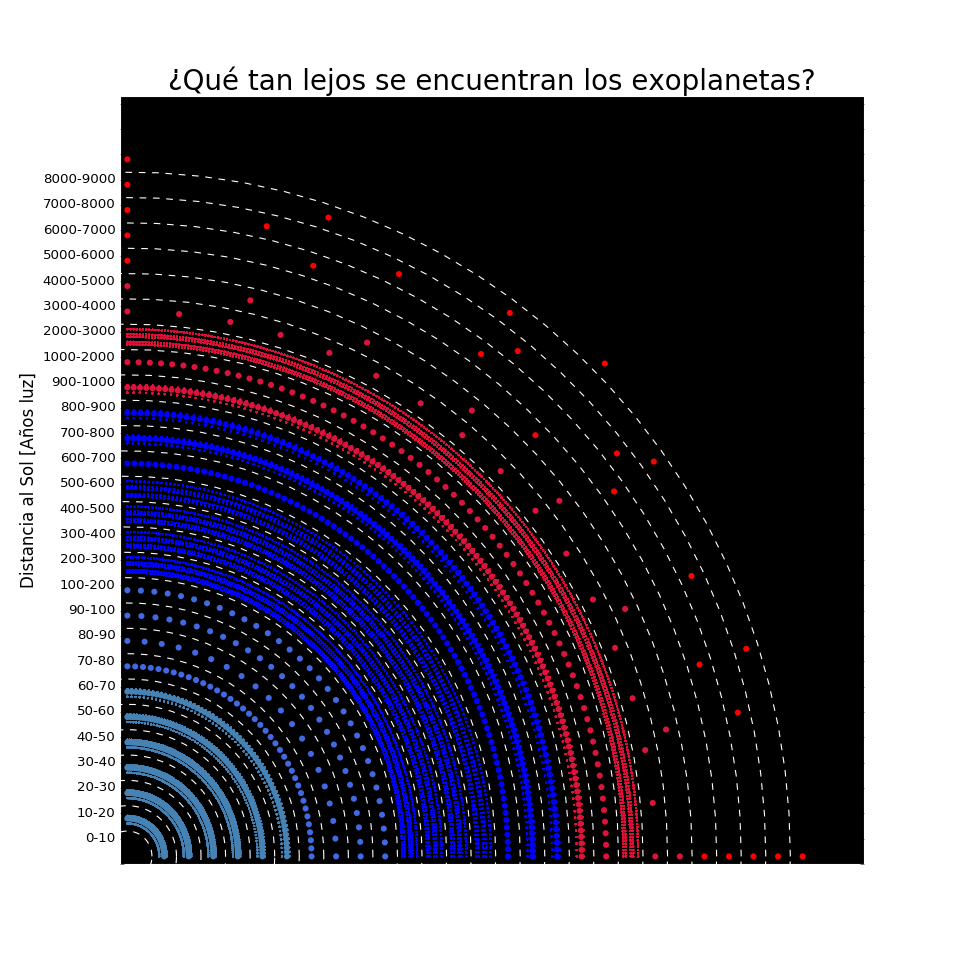

In [16]:
fig8 = plt.figure(figsize=(12,12))
ax8 = fig8.gca()

ax8.set_xlim(-0.3,30)
ax8.set_ylim(-0.3,30)


N = len(data)
    
rango1 = list(np.linspace(10,100,10))
rango2 = list(np.linspace(200,1000,9))
rango3 = list(np.linspace(2000,9000,8))
rango = rango1+rango2+rango3
    
angulos = np.linspace(0,2*np.pi,100)  
x = np.cos(angulos)
y = np.sin(angulos)
for i in range(1,len(rango)+1):
    Trayectoria = ax8.plot(x*i,y*i,color='white',linestyle='dashed')

pos = np.linspace(0,np.pi/2.,N)

for i in range(len(rango)):
    exec("count%d = 0"%i)
    
for i in range(N):
    if distancia[i] < 10:
        count0 += 1
    if distancia[i] >=10 and distancia[i] < 20:
        count1 += 1
    if distancia[i] >=20 and distancia[i] < 30:
        count2 += 1
    if distancia[i] >=30 and distancia[i] < 40:
        count3 += 1
    if distancia[i] >=40 and distancia[i] < 50:
        count4 += 1    
    if distancia[i] >=50 and distancia[i] < 60:
        count5 += 1
    if distancia[i] >=60 and distancia[i] < 70:
        count6 += 1
    if distancia[i] >=70 and distancia[i] < 80:
        count7 += 1
    if distancia[i] >=80 and distancia[i] < 90:
        count8 += 1
    if distancia[i] >=90 and distancia[i] < 100:
        count9 += 1
    if distancia[i] >=100 and distancia[i] < 200:
        count10 += 1
    if distancia[i] >=200 and distancia[i] < 300:
        count11 += 1
    if distancia[i] >=300 and distancia[i] < 400:
        count12 += 1
    if distancia[i] >=400 and distancia[i] < 500:
        count13 += 1
    if distancia[i] >=500 and distancia[i] < 600:
        count14 += 1
    if distancia[i] >=600 and distancia[i] < 700:
        count15 += 1
    if distancia[i] >=700 and distancia[i] < 800:
        count16 += 1
    if distancia[i] >=800 and distancia[i] < 900:
        count17 += 1
    if distancia[i] >=900 and distancia[i] < 1000:
        count18 += 1
    if distancia[i] >=1000 and distancia[i] < 2000:
        count19 +=1
    if distancia[i] >=2000 and distancia[i] < 3000:
        count20 +=1
    if distancia[i] >=3000 and distancia[i] < 4000:
        count21 +=1
    if distancia[i] >=4000 and distancia[i] < 5000:
        count22 +=1
    if distancia[i] >=5000 and distancia[i] < 6000:
        count23 +=1
    if distancia[i] >=6000 and distancia[i] <7000:
        count24 +=1
    if distancia[i] >=7000 and distancia[i] <8000:
        count25 +=1
    if distancia[i] >=8000 and distancia[i] <9000:
        count26 +=1
 
  
    
for i in range(len(rango)):
    exec("cantidad = np.linspace(0,np.pi/2.,count%d)"%i)
    exec("total = count%d"%i) 
    if i < len(rango)/5.:
        color = 'steelblue'
    elif i < len(rango)*2/5:
        color = 'royalblue'
    elif i < len(rango)*3/5.:
        color = 'blue'
    elif i < len(rango)*4/5.:
        color = 'crimson'
    else:
        color = 'red'
    if total > 100 or i < 6:
        for j in range(total):
            if j < total/2. :
                ax8.scatter((i+1.3)*np.cos(cantidad),(i+1.3)*np.sin(cantidad),s=3,edgecolor='None',color=color)
            else:
                ax8.scatter((i+1.6)*np.cos(cantidad),(i+1.6)*np.sin(cantidad),s=3,edgecolor='None',color=color)
    if total > 130:
        for j in range(total):
            if j < total/3. :
                ax8.scatter((i+1.2)*np.cos(cantidad),(i+1.2)*np.sin(cantidad),s=3,edgecolor='None',color=color)
            elif j > total/3 and j < total*2/3:
                ax8.scatter((i+1.5)*np.cos(cantidad),(i+1.5)*np.sin(cantidad),s=3,edgecolor='None',color=color)
            else:
                ax8.scatter((i+1.8)*np.cos(cantidad),(i+1.8)*np.sin(cantidad),s=3,edgecolor='None',color=color)
    else:
        ax8.scatter((i+1.5)*np.cos(cantidad),(i+1.5)*np.sin(cantidad),s=30,edgecolor='None',color=color)


ax8.tick_params(axis='x', which='both',bottom='off', top='off',labelbottom='off')
ax8.tick_params(axis='y', colors='black')
ax8.set_yticklabels([' ','0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100',
                    '100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900',
                    '900-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','6000-7000','7000-8000',
                    '8000-9000'])
start, end = ax8.get_ylim()
ax8.yaxis.set_ticks(np.arange(start, end, 1))
ax8.set_ylabel(u'Distancia al Sol [Años luz]',size=15)
ax8.yaxis.label.set_color('black')
ax8.xaxis.label.set_color('black')
ax8.set_title(u'¿Qué tan lejos se encuentran los exoplanetas?',color='black',size=25)  
fig8.savefig('Graph8.png')

<IPython.core.display.Javascript object>


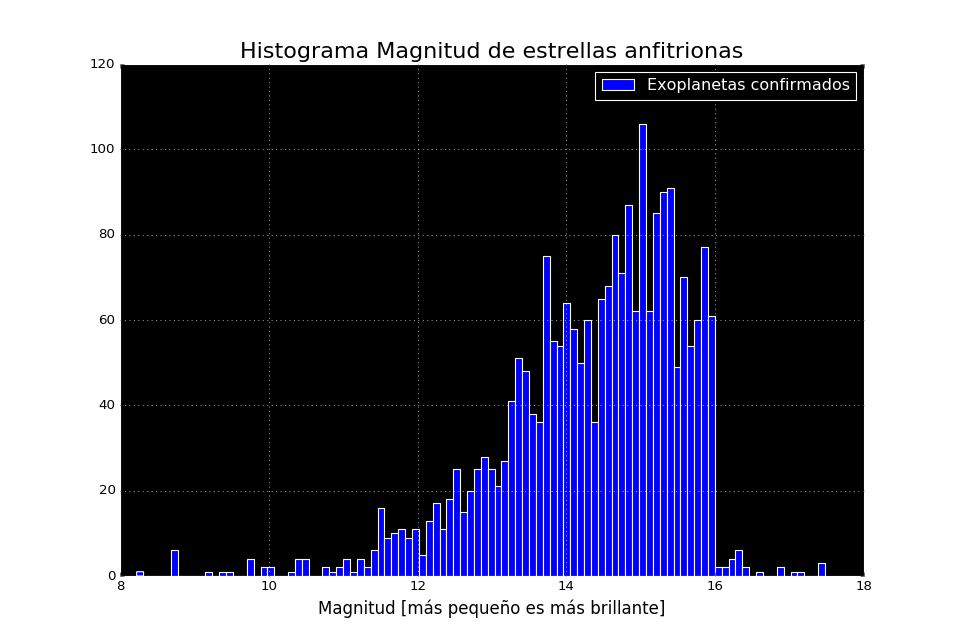

In [17]:
fig9 = plt.figure(figsize=(12,12))
ax9 = fig9.gca()
ax9 = confirmed.koi_kepmag.hist(bins=100, figsize=(12, 8),color='blue',label='Exoplanetas confirmados')
ax9.set_xlabel(u"Magnitud [más pequeño es más brillante]",size=15)
ax9.set_title(u"Histograma Magnitud de estrellas anfitrionas",color='black',size='20')
ax9.yaxis.label.set_color('black')
ax9.xaxis.label.set_color('black')
ax9.tick_params(axis='x', colors='black')
ax9.tick_params(axis='y', colors='black')
ax9.legend()
fig9.savefig('Graph9.png')

<IPython.core.display.Javascript object>


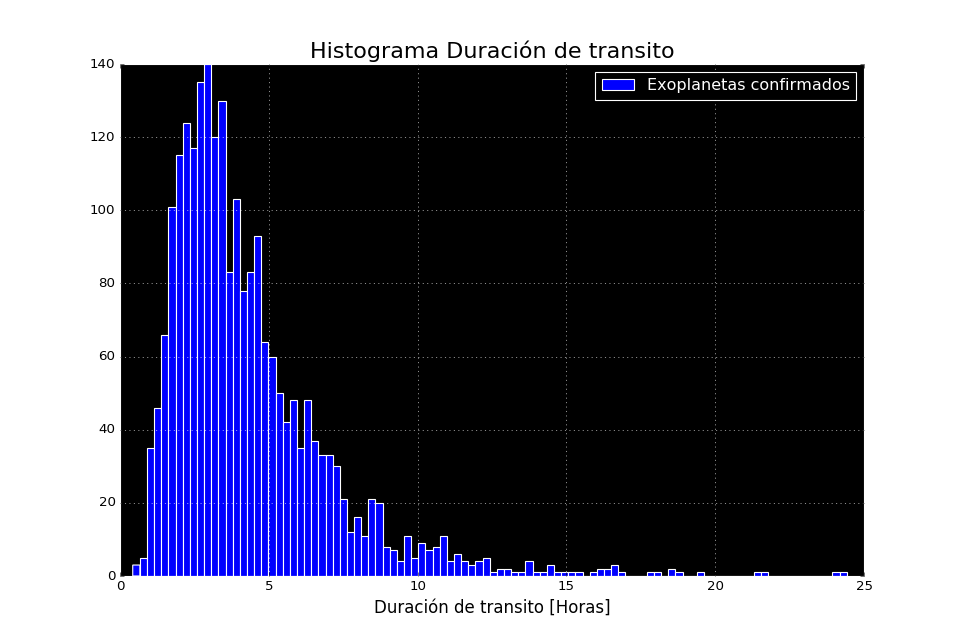

In [18]:
fig10 = plt.figure(figsize=(12,12))
ax10 = fig9.gca()
ax10 = confirmed.koi_duration.hist(bins=100, figsize=(12, 8),color='blue',label='Exoplanetas confirmados')
ax10.set_xlabel(u"Duración de transito [Horas]",size=15)
ax10.set_title(u"Histograma Duración de transito",color='black',size='20')
ax10.yaxis.label.set_color('black')
ax10.xaxis.label.set_color('black')
ax10.tick_params(axis='x', colors='black')
ax10.tick_params(axis='y', colors='black')
ax10.legend()
fig10.savefig('Graph10.png')